In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Bupa\Bupa_AN_20.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6
0,85,92.0,45.0,27.0,31.0,0.0
1,85,64.0,59.0,32.0,23.0,0.0
2,86,54.0,33.0,16.0,54.0,0.0
3,91,78.0,34.0,24.0,36.0,0.0
4,98,55.0,13.0,17.0,17.0,0.0
...,...,...,...,...,...,...
340,91,54.0,25.0,22.0,35.0,4.0
341,89,48.0,32.0,22.0,14.0,4.0
342,85,52.0,22.0,23.0,34.0,4.0
343,95,93.0,21.0,27.0,47.0,6.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
int64		column 1	0
float64		column 2	44
float64		column 3	88
float64		column 4	68
float64		column 5	90
float64		column 6	112


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6
count,345.000000,301.000000,257.000000,277.000000,255.000000,233.000000
mean,90.159420,69.289037,30.116732,24.180505,36.674510,3.613734
std,4.448096,18.320649,18.917016,8.934742,37.789303,3.602104
min,65.000000,23.000000,4.000000,8.000000,5.000000,0.000000
25%,87.000000,57.000000,19.000000,19.000000,15.000000,0.500000
50%,90.000000,66.000000,25.000000,22.000000,24.000000,3.000000
75%,93.000000,79.000000,34.000000,27.000000,39.000000,6.000000
max,103.000000,138.000000,155.000000,78.000000,297.000000,20.000000


<AxesSubplot:>

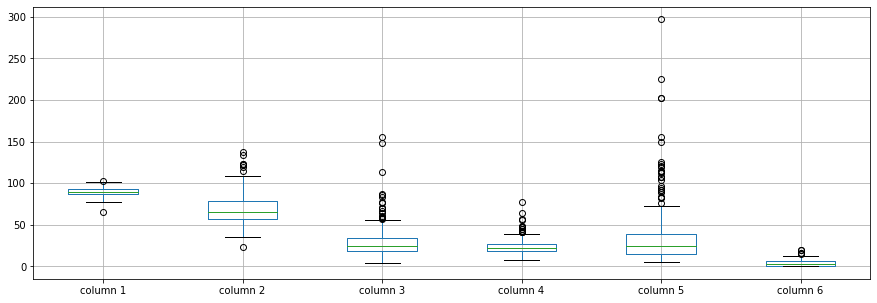

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    90.159420
column 2    69.289037
column 3    30.116732
column 4    24.180505
column 5    36.674510
column 6     3.613734
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6
column 1,1.000000,0.069266,0.082824,0.215782,0.148100,0.306587
column 2,0.069266,1.000000,0.091241,0.166618,0.076609,0.098039
column 3,0.082824,0.091241,1.000000,0.668346,0.456279,0.298250
column 4,0.215782,0.166618,0.668346,1.000000,0.487468,0.396313
column 5,0.148100,0.076609,0.456279,0.487468,1.000000,0.364782
column 6,0.306587,0.098039,0.298250,0.396313,0.364782,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [6,6+32,6+32+32,6+32+32+32,6+32+32+32+32,6+32+32+32,6+32+32,6+32,6], vae_layer = False, seed = 320)
imputer.build_model(df)
imputer.train_model(training_epochs=32)


Size index: [6]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 237.53114173525856
Epoch: 1 , loss: 237.59766496930803
Epoch: 2 , loss: 238.52162025088356
Epoch: 3 , loss: 238.31519208635603
Epoch: 4 , loss: 237.70633588518416
Epoch: 5 , loss: 238.76533798944382
Epoch: 6 , loss: 239.0730939592634
Epoch: 7 , loss: 237.9531438918341
Epoch: 8 , loss: 237.8669731503441
Epoch: 9 , loss: 239.34024338495163
Epoch: 10 , loss: 237.6328125
Epoch: 11 , loss: 239.1186806815011
Epoch: 12 , loss: 237.41482979910714
Epoch: 13 , loss: 238.87385995047433
Epoch: 14 , loss: 238.15706670851935
Epoch: 15 , loss: 238.43546767461868
Epoch: 16 , loss: 238.25091407412575
Epoch: 17 , loss: 236.3327375139509
Epoch: 18 , loss: 238.4685312906901
Epoch: 19 , loss: 239.51143246605284
Epoch: 20 , loss: 239.12215823218935
Epoch: 21 , loss: 239.22101266043526
Epoch: 22 , loss: 238.17631094796317
Epoch: 23 , loss: 239.27348981584822
Epoch: 24 , loss: 237.7445111955915
Epoch: 25 , loss: 239.7269897460

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(345, 6)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    90.000000
column 2     0.039147
column 3     0.042528
column 4    15.000000
column 5     0.035304
column 6     0.500000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Bupa.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6
0,0,0.0,0.0,0.0,0.0,0.0
1,0,0.0,0.0,0.0,0.0,0.0
2,0,0.0,0.0,0.0,0.0,0.0
3,0,0.0,0.0,0.0,0.0,0.0
4,0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
340,0,0.0,0.0,0.0,0.0,0.0
341,0,0.0,0.0,0.0,0.0,0.0
342,0,0.0,0.0,0.0,0.0,0.0
343,0,0.0,0.0,0.0,0.0,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

877.8998152065953

In [17]:
denominator=Frobenius_norm(complete_df)
denominator

2519.762091944396

In [18]:
NRMS=numerator/denominator
NRMS


0.3484058348259206

In [19]:
new_df.iloc[66,:]

column 1    86.000000
column 2    54.000000
column 3     0.042533
column 4    21.000000
column 5     0.049244
column 6     0.043441
Name: 66, dtype: float64

In [20]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6
0,85,92.0,45.0,27.0,31.0,0.0
1,85,64.0,59.0,32.0,23.0,0.0
2,86,54.0,33.0,16.0,54.0,0.0
3,91,78.0,34.0,24.0,36.0,0.0
4,98,55.0,13.0,17.0,17.0,0.0
...,...,...,...,...,...,...
340,91,54.0,25.0,22.0,35.0,4.0
341,89,48.0,32.0,22.0,14.0,4.0
342,85,52.0,22.0,23.0,34.0,4.0
343,95,93.0,21.0,27.0,47.0,6.0


In [21]:
imputations[-1].to_excel("Bupa_AN_20(imp).xlsx", index=False, header=False)